A begineer machine learning model of House Price prediciton system. 
Data source - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
Check it..

## Description of feature variables
id - Unique ID for each home sold.
date - Date of the home sale.
price - Price of each home sold.
bedrooms - Number of bedrooms.
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower.
sqft_living - Square footage of the apartments interior living space.
sqft_lot - Square footage of the land space.
floors - Number of floors.
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not.
view - An index from 0 to 4 of how good the view of the property was.
condition - An index from 1 to 5 on the condition of the apartment.
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level.
sqft_basement - The square footage of the interior housing space that is below ground level.
yr_built - The year the house was initially built.
yr_renovated - The year of the house’s last renovation.
zipcode - What zipcode area the house is in.
lat - Latitudede.
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors.
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import folium
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('../input/housesalesprediction/kc_house_data.csv')

In [3]:
pd.set_option("display.max_rows",25,"display.max_columns",21)

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21613, 21)

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df.describe().round()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4.580302e+09,540088.0,3.0,2.0,2080.0,15107.0,1.0,0.0,0.0,3.0,8.0,1788.0,292.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12768.0
std,2.876566e+09,367127.0,1.0,1.0,918.0,41421.0,1.0,0.0,1.0,1.0,1.0,828.0,443.0,29.0,402.0,54.0,0.0,0.0,685.0,27304.0
min,1.000102e+06,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0
25%,2.123049e+09,321950.0,3.0,2.0,1427.0,5040.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10688.0,2.0,0.0,0.0,4.0,8.0,2210.0,560.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,13.0,9410.0,4820.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0


In [8]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Splitting date variable

In [9]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['weekday'] = df['date'].apply(lambda x: x.dayofweek)
d = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
df['weekday']=df['weekday'].map(d)

#Target variable
df['price']/1000

In [10]:
df.describe().round()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
count,2.161300e+04,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,...,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0,21613.0
mean,4.580302e+09,540088.0,3.0,2.0,2080.0,15107.0,1.0,0.0,0.0,3.0,...,292.0,1971.0,84.0,98078.0,48.0,-122.0,1987.0,12768.0,2014.0,7.0
std,2.876566e+09,367127.0,1.0,1.0,918.0,41421.0,1.0,0.0,1.0,1.0,...,443.0,29.0,402.0,54.0,0.0,0.0,685.0,27304.0,0.0,3.0
min,1.000102e+06,75000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,...,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,651.0,2014.0,1.0
25%,2.123049e+09,321950.0,3.0,2.0,1427.0,5040.0,1.0,0.0,0.0,3.0,...,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5100.0,2014.0,4.0
50%,3.904930e+09,450000.0,3.0,2.0,1910.0,7618.0,2.0,0.0,0.0,3.0,...,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7620.0,2014.0,6.0
75%,7.308900e+09,645000.0,4.0,2.0,2550.0,10688.0,2.0,0.0,0.0,4.0,...,560.0,1997.0,0.0,98118.0,48.0,-122.0,2360.0,10083.0,2015.0,9.0
max,9.900000e+09,7700000.0,33.0,8.0,13540.0,1651359.0,4.0,1.0,4.0,5.0,...,4820.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,871200.0,2015.0,12.0


In [11]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.010128,-0.011708
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576,-0.010081
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,...,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.009838,-0.001533
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,...,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.026596,0.007392
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.029038,0.011810
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.005468,-0.002369
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.022315,0.014005
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.004165,0.008132
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.001364,-0.005638
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589,0.021978


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [13]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [14]:
def detect_duplicates(df_temp): 
    print('Duplicates in data: ', df.duplicated().sum())
    return df.duplicated().sum()
detect_duplicates(df)

Duplicates in data:  0


0

In [15]:
df = df[df['price'] >= 604.0].reset_index(drop=True)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,weekday
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,Monday
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,Tuesday
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,Wednesday
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,Tuesday
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,Wednesday


## EDA

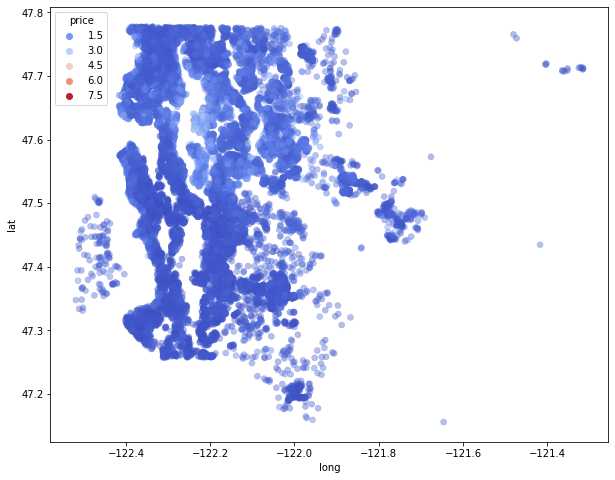

In [16]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=df ,hue='price',alpha=0.4,palette='coolwarm',edgecolor=None)
plt.show()

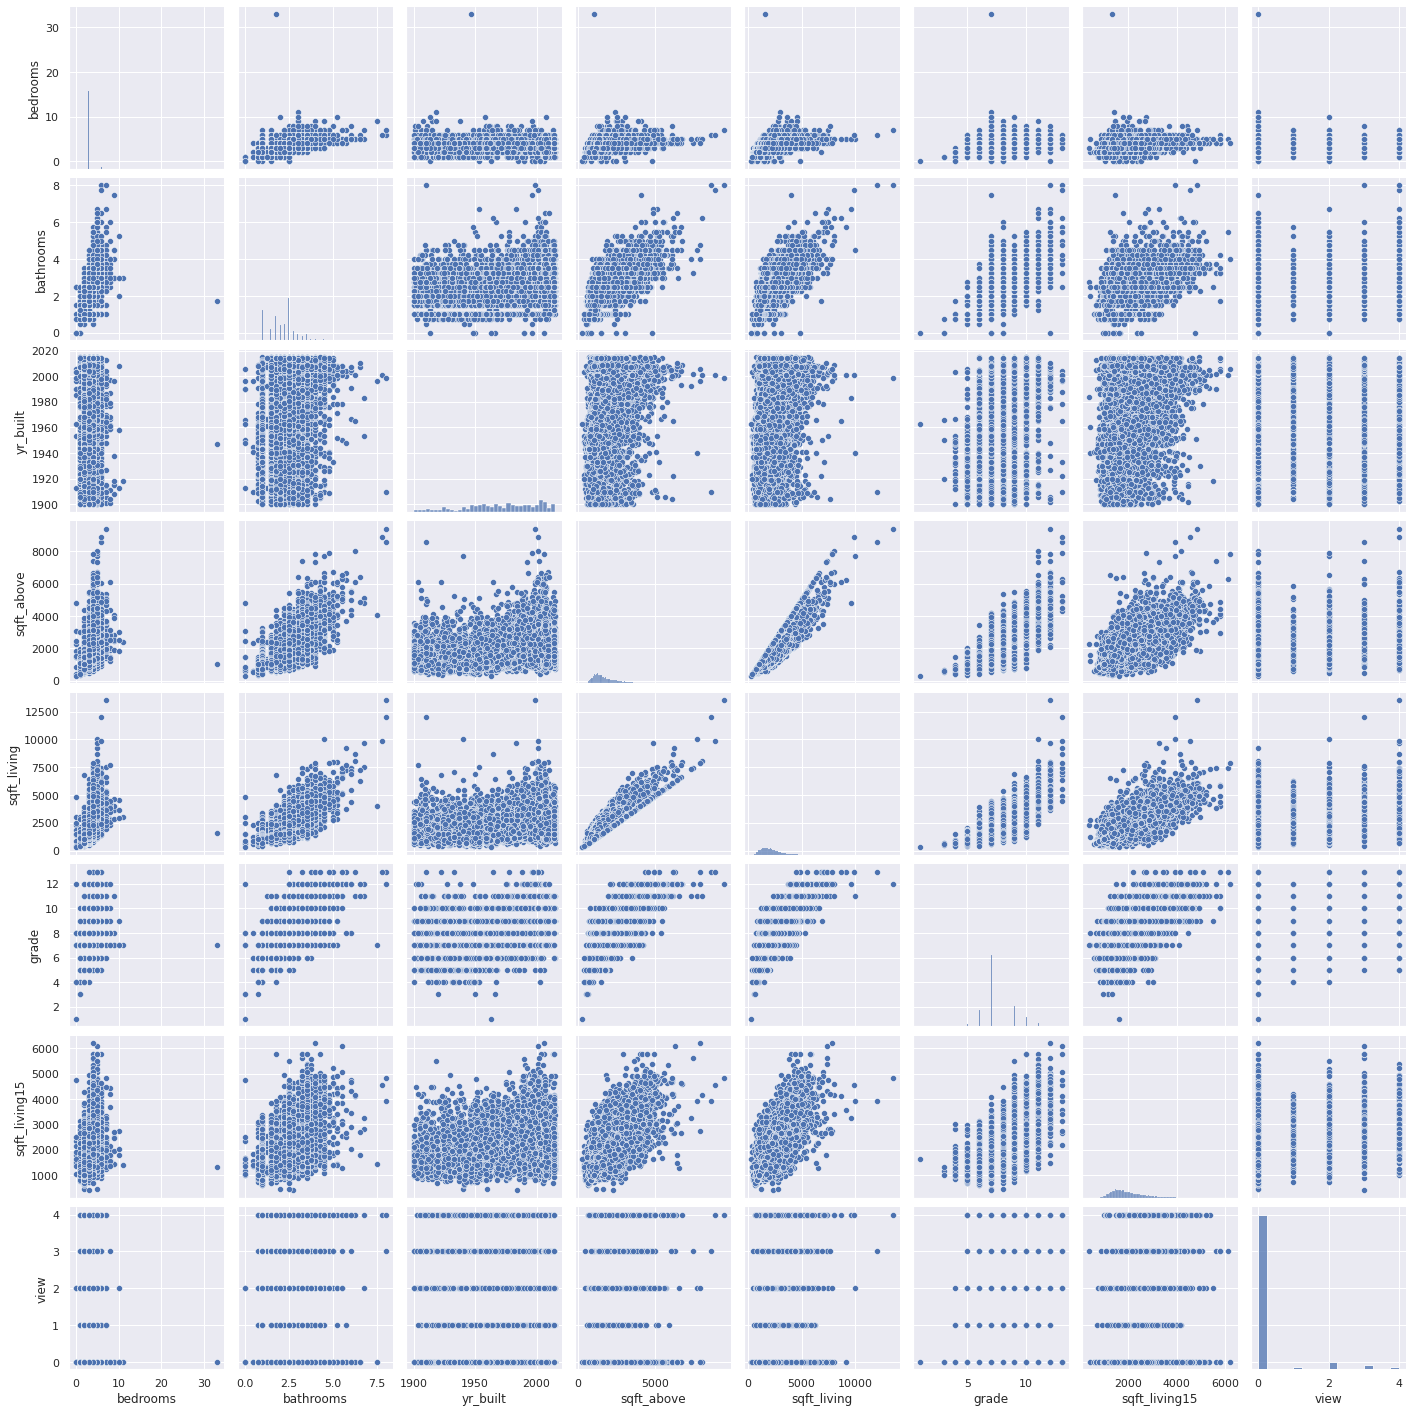

In [17]:
sns.set()
cols = ['bedrooms', 'bathrooms','yr_built','sqft_above','sqft_living','grade','sqft_living15','view']
sns.pairplot(df[cols] ,size = 2.5)
plt.show();


<AxesSubplot:>

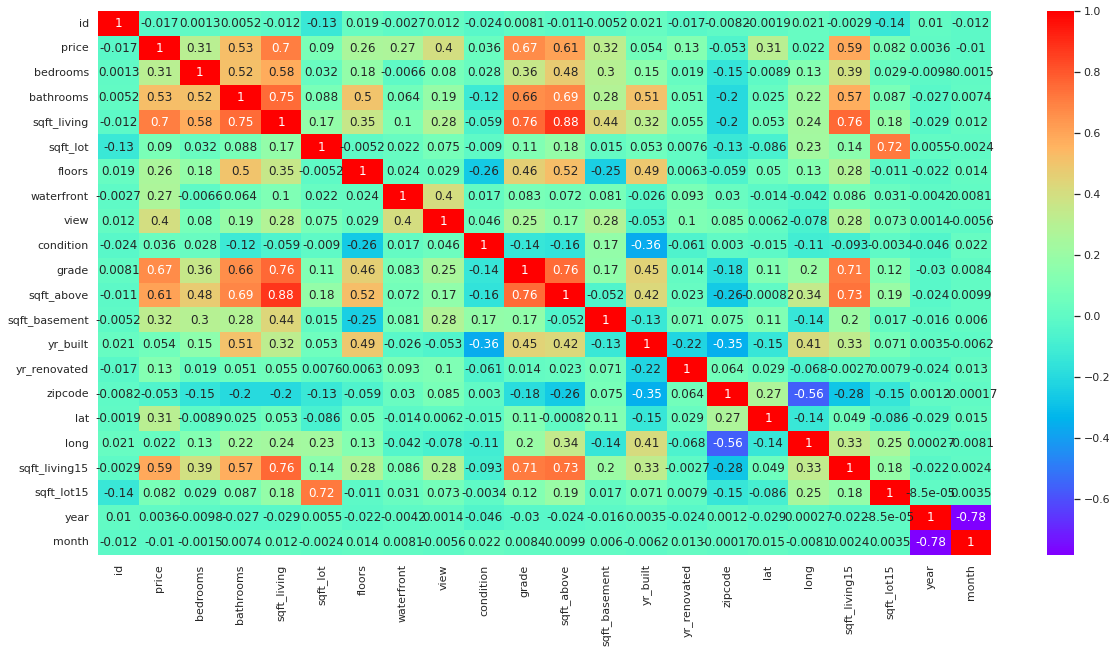

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='rainbow')

## Using Folium

In [19]:
affordable_house = df.price.idxmin()                                     

In [20]:
print('${:,.2f}'.format(df.price[affordable_house]))

$75,000.00


In [21]:
lat= df.lat[affordable_house]
long = df.long[affordable_house]
print('Longitude: {}, Latitude: {}'.format(long, lat))

Longitude: -121.906, Latitude: 47.2638


In [22]:
folium_map = folium.Map(location=[lat, long], zoom_start=20)

In [23]:
# Add a custom basemap
base_map = folium.TileLayer(tiles = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}', attr = 'Google',name = 'Google Satellite',overlay = True,control = True)
base_map.add_to(folium_map)
folium.Circle(radius=50,location=[lat, long],color="lightblue",fill=True).add_to(folium_map)

# Display the map.
folium_map

In [24]:
# from numpy.lib.shape_base import column_stack
# x=df{column_stack:[]}

In [25]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [26]:
# plt.plot(x=df[['condition']]) 

## Train test split

In [27]:
x = df[[ 'bedrooms', 'bathrooms','yr_built','sqft_above','sqft_living','grade','sqft_living15','view']] 
x.head()

,bedrooms,bathrooms,yr_built,sqft_above,sqft_living,grade,sqft_living15,view
0,3,1.00,1955,1180,1180,7,1340,0
1,3,2.25,1951,2170,2570,7,1690,0
2,2,1.00,1933,770,770,6,2720,0
3,4,3.00,1965,1050,1960,7,1360,0
4,3,2.00,1987,1680,1680,8,1800,0


In [28]:
y=df['price']
print("\nTarget variacble -\n ")
y.head()


Target variacble -
 


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17290, 8), (4323, 8), (17290,), (4323,))

## Model Building

In [31]:
#cross_val_score
from sklearn.model_selection import cross_val_score

#scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score #score

In [33]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 4)
rf  = RandomForestRegressor(max_depth = 3, n_estimators=1000)
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
xgb = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)
cb  = CatBoostRegressor(learning_rate =.01, max_depth =7, verbose = 0)

In [34]:
reg = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),("CatBoost",cb),('XGBRegressor', xgb)]

Linear Regression : 64 %
K Nearest Neighbours : 70 %
Decision Tree : 60 %
Random Forest : 61 %
AdaBoost : 60 %
Gradient Boosting Regressor : 72 %
CatBoost : 70 %
XGBRegressor : 70 %


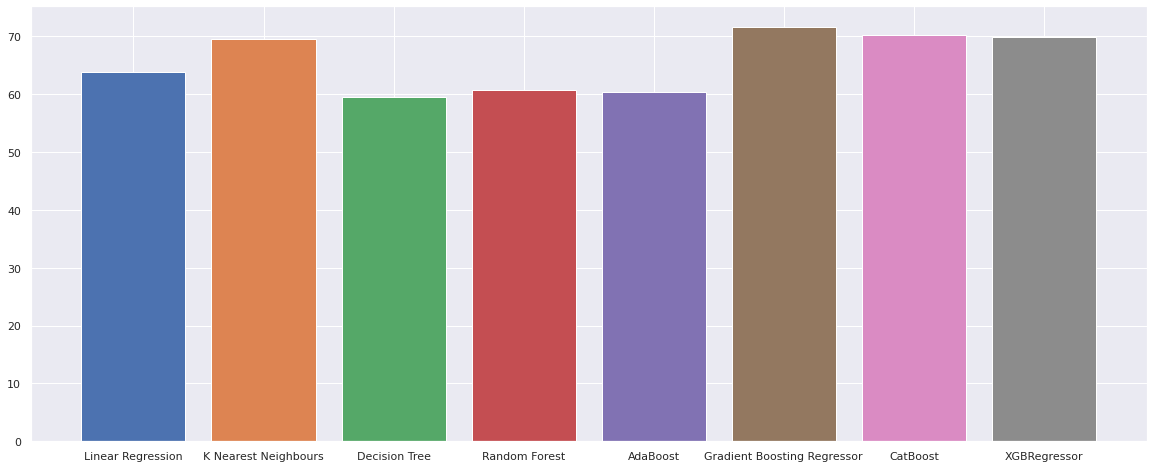

In [35]:
for regressor_name, regressor in reg:

    regressor.fit(x_train, y_train)    
  
    y_pred = regressor.predict(x_test)
    accuracy = round(r2_score(y_test,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

y_predict = xgb.predict(x_test)
cb_r2_score = r2_score(y_test, y_predict)
print('R square Score = ', round(cb_r2_score, 5))

mse = mean_squared_error(y_test, y_predict)
rmse_3 = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse_3, 5))

R square Score =  0.69908
Root Mean Squared Error =  210575.9366


In [37]:
pd.DataFrame({'Y_test':y_test,'Y_predict':y_predict})

,Y_test,Y_predict
16663,470000.0,508803.21875
3438,1100000.0,788367.62500
14357,475000.0,409472.84375
8694,571000.0,597867.43750
9923,775000.0,729015.00000
...,...,...
3599,488250.0,382212.00000
18909,234000.0,374237.84375
9053,350000.0,634560.18750
21513,505000.0,512501.59375


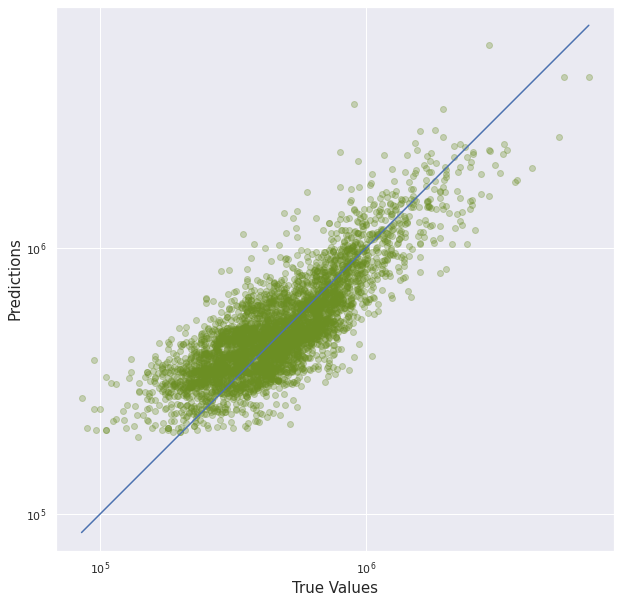

In [38]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predict, c='olivedrab',alpha=0.3)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predict), max(y_test))
p2 = min(min(y_predict), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


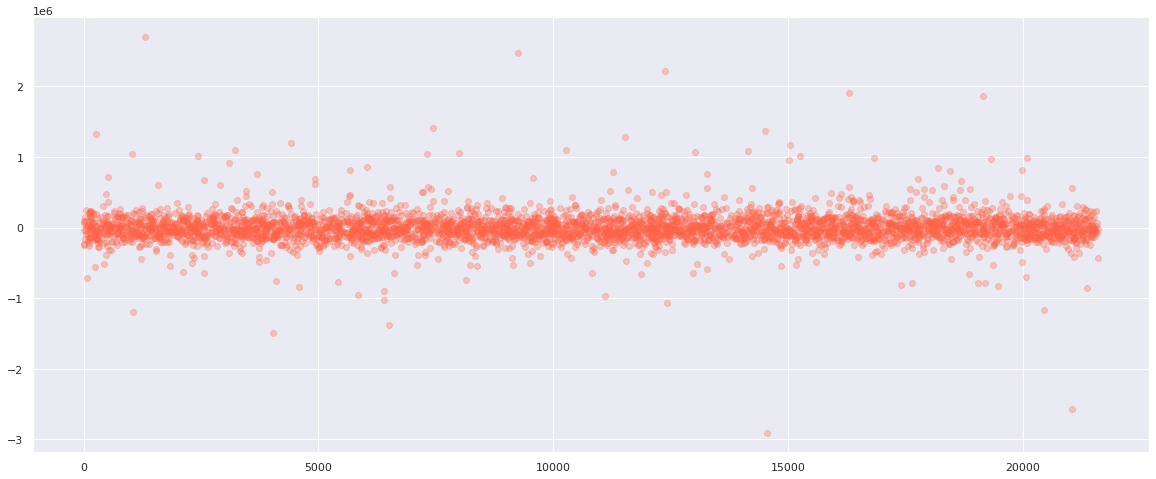

In [39]:
g=plt.plot(y_test- y_predict,marker='o',linestyle='',c='tomato',alpha=0.3)

## Classification Model

In [40]:
Water_view = len(df[df['waterfront'] == 0])
No_Water_view = len(df[df['waterfront'] == 1])
print("X1: {:.2f}%".format(( Water_view/ (len(df['waterfront']))*100)))
print("X2: {:.2f}%".format((No_Water_view / (len(df['waterfront']))*100)))

X1: 99.25%
X2: 0.75%


In [41]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

<AxesSubplot:title={'center':'Count of Diagnosis of kidney disease'}>

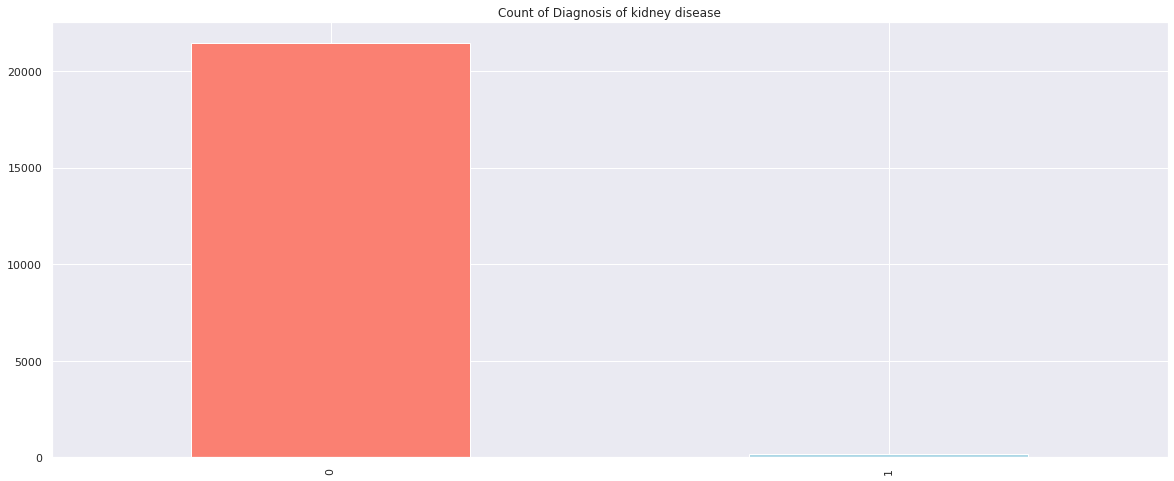

In [42]:
df['waterfront'].value_counts().plot(kind='bar',color=['salmon','lightblue'],
                                title="Count of Diagnosis of kidney disease")

In [43]:
balanced_df = pd.concat([df[df["waterfront"] == 0], df[df["waterfront"] == 1].sample(n = 115, replace = True)], axis = 0)
balanced_df.reset_index(drop=True, inplace=True)
balanced_df["waterfront"].value_counts()

0    21450
1      115
Name: waterfront, dtype: int64

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [45]:
yi=df['waterfront']

In [46]:
xi=df[[ 'price','bedrooms', 'bathrooms','yr_built','sqft_above','sqft_living','view']] 

In [47]:
yi.head()

0    0
1    0
2    0
3    0
4    0
Name: waterfront, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
xi_train, xi_test, yi_train, yi_test = train_test_split(xi, yi, test_size=0.2, random_state=0)

## K-NN

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

params = {
    "n_neighbors":[3,5,7,9],
    "weights":["uniform","distance"],
    "algorithm":["ball_tree","kd_tree","brute"],
    "leaf_size":[25,30,35],
    "p":[1,2]
}

gs = GridSearchCV(knn, param_grid=params)
model = knn.fit(xi_train,yi_train)
preds = model.predict(xi_test)
accuracy_score(yi_test, preds)

0.9942169789498034

In [50]:
knn_pred = model.predict(xi_test)

In [51]:
tn, fp, fn, tp = confusion_matrix(yi_test, preds).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 4298
False Pos: 3
False Neg: 22
True Pos: 0


In [52]:
accuracy_score(yi_test,knn_pred)

0.9942169789498034

## LDA

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [54]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(xi, yi)

LinearDiscriminantAnalysis()

In [55]:
y_pred_lda = clf_lda.predict(xi) 

In [56]:
y_pred_lda

array([0, 0, 0, ..., 0, 0, 0])

In [57]:
confusion_matrix(yi, y_pred_lda)

array([[21082,   368],
       [   16,   147]])

In [58]:
precision_score(yi, y_pred_lda)

0.2854368932038835

In [59]:
recall_score(yi, y_pred_lda)

0.901840490797546

In [60]:
roc_auc_score(yi, y_pred_lda)

0.9423421568206845

In [61]:
r2_score(yi,y_pred_lda)

-1.3737303187609942

In [62]:
accuracy_score(yi,y_pred_lda)

0.9822329153750058

## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
clf_LR = LogisticRegression()
clf_LR.fit(xi_train,yi_train)

LogisticRegression()

In [65]:
y_test_pred = clf_LR.predict(xi_test)

In [66]:
confusion_matrix(yi_test, y_test_pred)

array([[4297,    4],
       [  20,    2]])

In [67]:
accuracy_score(yi_test, y_test_pred)

0.9944482997918113

Summary of Model-
1)The data visualize gives insights of correlation between the feature variables.
2)The Regression model predicts about 70% value correctly.
3)The classification is based on waterfront variable which is sightly influencing the accuracy of classification.
4)The overall model is best suited for a machine learning begineer.

## Thank-you